The following simple ODE uncovers a surprise. 

In [1]:
f = (u,t) -> u^2 - u^3;
u0 = 0.005;

We will solve the problem first with the implicit AM2 method using $n=200$ steps.

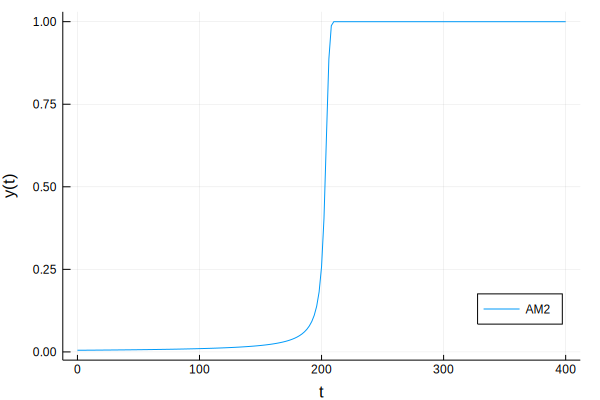

In [2]:
include("../FNC.jl")
tI,uI = FNC.am2(f,[0.,400.],u0,200);

using Plots
plot(tI,uI,label="AM2",
    xlabel="t",ylabel="y(t)",leg=:bottomright)

Now we repeat the process using the explicit AB4 method.

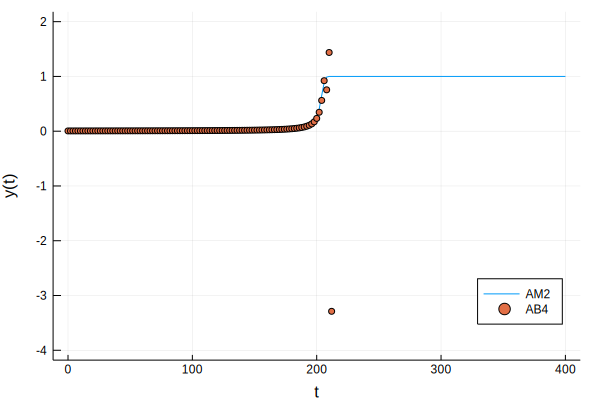

In [3]:
tE,uE = FNC.ab4(f,[0.,400.],u0,200);
scatter!(tE,uE,m=3,label="AB4",ylim=[-4,2])

Once the solution starts to take off, the AB4 result goes catastrophically wrong.

In [4]:
uE[105:111]

7-element Array{Float64,1}:
   0.7553857798343923   
   1.4372970308402562   
  -3.2889768512289934   
 214.1791132643978      
  -4.482089146771584e7  
   4.1268902909420876e23
  -3.221441244795439e71 

We hope that AB4 will converge in the limit $h\to 0$, so let's try using more steps.

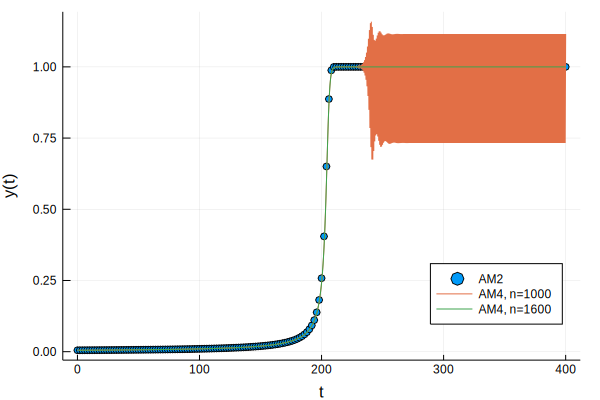

In [5]:
scatter(tI,uI,label="AM2",m=(:o,3),
    xlabel="t",ylabel="y(t)",leg=:bottomright)

for n = [1000,1600]
    tE,uE = FNC.ab4(f,[0 400],u0,n);
    plot!(tE,uE,label="AM4, n=$n")
end
plot!([],[],label="")

So AB4, which is supposed to be _more_ accurate than AM2, actually needs something like 8 times as many steps to get a reasonable-looking answer!